In [ ]:
import pandas as pd

# Readinding Files into dataframes.
OWM = pd.read_csv('OWM.csv')
DHT = pd.read_csv('DHT22.csv')

print(DHT)


                     created_at  entry_id  field1  field2  latitude  \
0     2023-12-05T01:13:27+00:00         1    14.0    75.7       NaN   
1     2023-12-05T01:16:28+00:00         2    14.0    76.2       NaN   
2     2023-12-05T01:19:29+00:00         3    14.0    76.2       NaN   
3     2023-12-05T01:22:29+00:00         4    14.0    75.5       NaN   
4     2023-12-05T01:25:30+00:00         5    14.1    75.4       NaN   
...                         ...       ...     ...     ...       ...   
4371  2023-12-14T04:58:29+00:00      4372    18.2    57.8       NaN   
4372  2023-12-14T05:01:29+00:00      4373    18.2    57.8       NaN   
4373  2023-12-14T05:04:30+00:00      4374    18.2    58.0       NaN   
4374  2023-12-14T05:07:30+00:00      4375    18.2    58.4       NaN   
4375  2023-12-14T05:10:31+00:00      4376    18.1    58.3       NaN   

      longitude  elevation  status  
0           NaN        NaN     NaN  
1           NaN        NaN     NaN  
2           NaN        NaN     NaN  

In [ ]:

OWM_df = pd.DataFrame(OWM)
DHT_df = pd.DataFrame(DHT)

# Changing the title of the columns
OWM_df = OWM_df.rename(columns={'created_at': 'Time', 'field1': 'Outdoor Humi', 'field2': 'Outdoor Temp'})
DHT_df = DHT_df.rename(columns={'created_at': 'Time', 'field1': 'Indoor Temp', 'field2': 'Indoor Humi'})

# Converting timestamp columns to datetime objects
OWM_df['Time'] = pd.to_datetime(OWM_df['Time'])
DHT_df['Time'] = pd.to_datetime(DHT_df['Time'])

# Specifying the tolerance for the merge.
tolerance = pd.Timedelta('3 minutes')

# Performing asof merge based on the 'Time' column
merged_df = pd.merge_asof(OWM_df, DHT_df, on='Time', tolerance=tolerance)

print(merged_df)

                          Time  entry_id_x  Outdoor Humi  Outdoor Temp  \
0    2023-12-05 01:13:40+00:00           1            91          5.93   
1    2023-12-05 01:16:41+00:00           2            91          5.93   
2    2023-12-05 01:19:42+00:00           3            91          5.93   
3    2023-12-05 01:22:43+00:00           4            91          5.93   
4    2023-12-05 01:25:43+00:00           5            91          5.93   
...                        ...         ...           ...           ...   
2880 2023-12-14 04:59:23+00:00        2881            87          3.73   
2881 2023-12-14 05:02:24+00:00        2882            89          3.60   
2882 2023-12-14 05:05:25+00:00        2883            89          3.60   
2883 2023-12-14 05:08:26+00:00        2884            89          3.60   
2884 2023-12-14 05:11:26+00:00        2885            89          3.61   

      latitude_x  longitude_x  elevation_x  status_x  entry_id_y  Indoor Temp  \
0            NaN          NaN 

In [ ]:
#Dropping the uneeded columns.
columns_to_drop = ['entry_id_x', 'latitude_x', 'longitude_x','elevation_x', 'status_x','entry_id_y', 'latitude_y', 'longitude_y','elevation_y', 'status_y',]

dataset = merged_df.drop(columns=columns_to_drop)

                       Time  Outdoor Humi  Outdoor Temp  Indoor Temp  \
0 2023-12-05 01:13:40+00:00            91          5.93         14.0   
1 2023-12-05 01:16:41+00:00            91          5.93         14.0   
2 2023-12-05 01:19:42+00:00            91          5.93         14.0   
3 2023-12-05 01:22:43+00:00            91          5.93         14.0   
4 2023-12-05 01:25:43+00:00            91          5.93         14.1   

   Indoor Humi  
0         75.7  
1         76.2  
2         76.2  
3         75.5  
4         75.4  


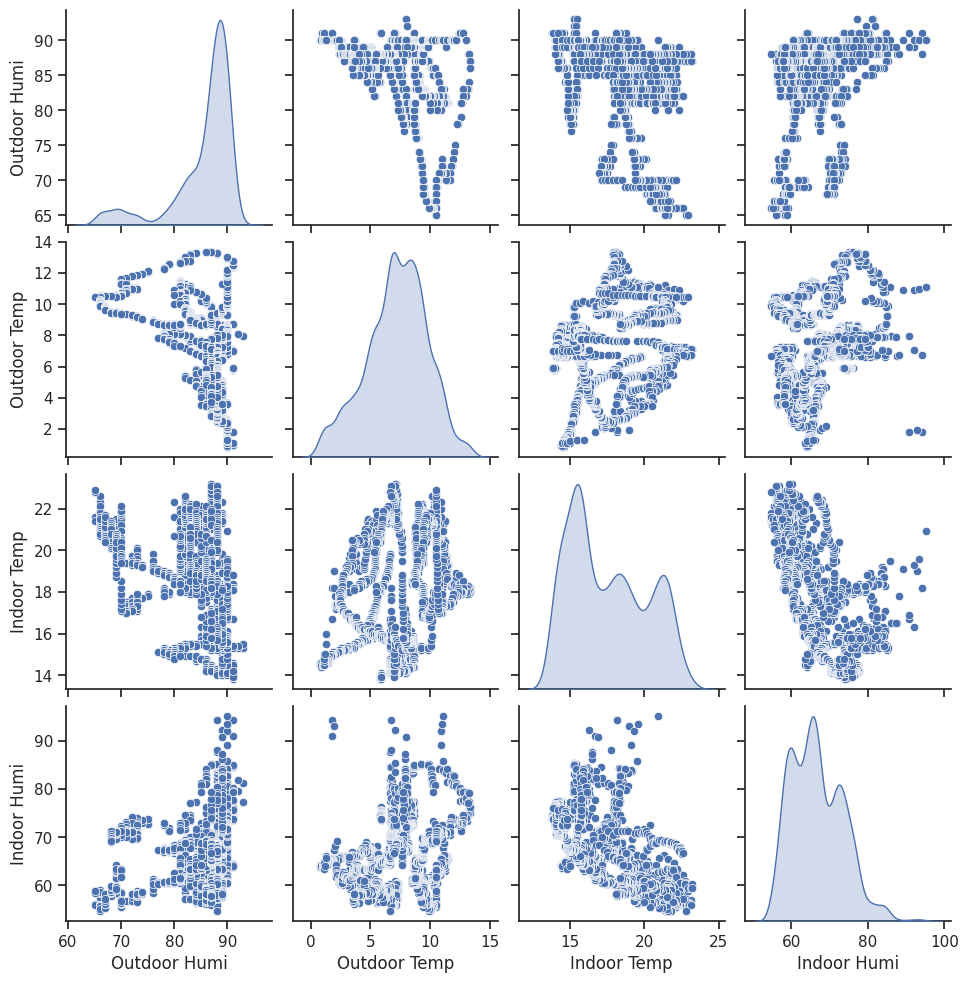

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating scatterplots for all possible correlations
sns.set(style="ticks")
sns.pairplot(dataset, kind="scatter", diag_kind="kde")
plt.show()
